In [1]:
print("YOLOv1")

YOLOv1


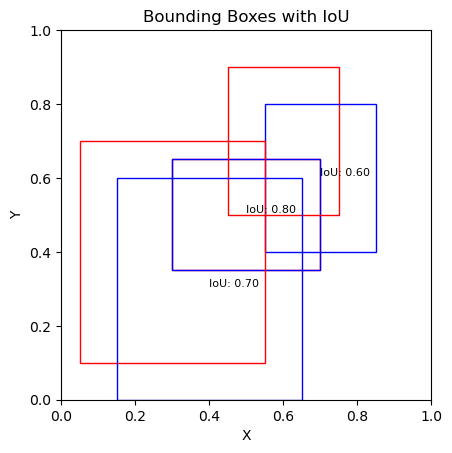

In [2]:
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_boxes(predictions, targets, iou):
    fig, ax = plt.subplots()

    for pred_box, target_box, iou_value in zip(predictions, targets, iou):
        # Plot predicted bounding box
        pred_rect = Rectangle((pred_box[0] - pred_box[2] / 2, pred_box[1] - pred_box[3] / 2),
                              pred_box[2], pred_box[3], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(pred_rect)

        # Plot target bounding box
        target_rect = Rectangle((target_box[0] - target_box[2] / 2, target_box[1] - target_box[3] / 2),
                                target_box[2], target_box[3], linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(target_rect)

        # Annotate IoU value
        ax.annotate(f"IoU: {iou_value:.2f}", (max(pred_box[0], target_box[0]), min(pred_box[1], target_box[1])),
                    color='black', fontsize=8, ha='left', va='bottom')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Bounding Boxes with IoU')

    plt.show()

# Example data
predictions = torch.tensor([
    [0.5, 0.5, 0.4, 0.3],  # [x, y, w, h] format
    [0.6, 0.7, 0.3, 0.4],
    [0.3, 0.4, 0.5, 0.6]
])

targets = torch.tensor([
    [0.5, 0.5, 0.4, 0.3],  # [x, y, w, h] format
    [0.7, 0.6, 0.3, 0.4],
    [0.4, 0.3, 0.5, 0.6]
])

iou = torch.tensor([0.8, 0.6, 0.7])  # Example IoU values

plot_boxes(predictions, targets, iou)
